In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# pip install folium

In [67]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from shapely.geometry import Polygon, Point

In [5]:
# Load data
territory = pd.read_csv("/content/drive/MyDrive/8th semester/기계학습개론/Project/South_Korea_territory.csv")
vertiport= pd.read_csv("/content/drive/MyDrive/8th semester/기계학습개론/Project/Vertiport_candidates.csv")

# **Task 1: Toy Problem**
* Assume that your team is given the following eight points(x,y) in the Cartesian coordinate system:

In [6]:
p1 = [2,10]
p2 = [2,5]
p3 = [8,4]
p4 = [5,8]
p5 = [7,5]
p6 = [6,4]
p7 = [1,2]
p8 = [4,9]

* Your team is required to make three different clusters for the points using the K-Means algorithm. Suppose that three different centroid points are randomly pre-determined as follows:

In [7]:
# c1 is associated with Cluster1
c1 = [2,10]
# c2 is associated with Cluster2
c2 = [5, 8]
# c3 is associated with Cluster3
c3 = [1,2]

## **K-means Algorithm**
1. Specify the number of clusters, K
 * The elbow method is used to find the optimal number of clusters
2. Initialize centroid points by randomly choosing K instances
3. Label each data to its closest centroid point using Eucldean distance
4. Recalculate centroid points by taking the mean of all points in a cluster
5. Repeat steps (3 to 4) until the algorithm meets a user-defined criterion
  * Reassign points based on the new centroid locations
  * Update the centroid locations as the average of those points assigned to each cluster

* Euclidean distance
\begin{align}
{d(p,q) = \sqrt{(q_1 - p_1)^2+(q_2 - p_2)^2}}
\end{align}

In [97]:
class KMeans:
  # 1. Specify the number of clusters, K
  def __init__(self, X, n_clusters, max_iterations = 100):
    self.n_clusters = n_clusters # The algorithm requires specifying the number of clusters in advance
    self.max_iterations = max_iterations
    # 2. Initialize centroid points by randomly choosing K instances
    # Suppose that three different centroid points are randomly pre-determined
    self.centroids = np.array([c1, c2, c3]) 
    self.labels = np.zeros(len(X))

  # 5. Repeat steps (3 to 4) until the algorithm meets a user-defined criterion
  def fit(self, X):
    for _ in range(self.max_iterations):
      # 3.Label each data to its closest centroid point using Eucldean distance
      clusters = self._assign_clusters(X)

      # Update the centroid locations as the average of those points assigned to each cluster
      new_centroids = self._update_centroids(X, clusters)

      # Stop if the centroid points do not change any more or the points clustered the same as previous
      if np.all(self.centroids == new_centroids) or np.all(self.labels == self._assign_labels(X)):
        break
      # Reassign points based on the new centroid locations  
      self.centroids = new_centroids
      # save the array of labels for later visualization
      self.labels = self._assign_labels(X)

  def _assign_clusters(self, X):
    # Visit each point and compute Euclidean distances from the centroid points
    distances = np.sqrt(((X[:, np.newaxis] - self.centroids) ** 2).sum(axis=2))
    # Find the index of the centroid with the minimum distance for each data
    clusters = np.argmin(distances, axis=1) 
    # returns an array of cluster indices indicating the closest centroid for each data point.
    return clusters 

  def _update_centroids(self, X, clusters):
        new_centroids = np.empty_like(self.centroids)
        for cluster_idx in range(self.n_clusters):
            points_in_cluster = X[clusters == cluster_idx]
            if len(points_in_cluster) > 0:
                new_centroids[cluster_idx] = points_in_cluster.mean(axis=0)
            else:
                new_centroids[cluster_idx] = self.centroids[cluster_idx]
        return new_centroids

  def _assign_labels(self, X):
      distances = np.sqrt(((X[:, np.newaxis] - self.centroids) ** 2).sum(axis=2))
      return np.argmin(distances, axis=1)

  # Visualize the results
  def plot_clusters(self, X):
        plt.figure(figsize=(8, 6))
        
        # Plot data points
        for cluster_idx in range(self.n_clusters):
            points_in_cluster = X[self.labels == cluster_idx]
            plt.scatter(points_in_cluster[:, 0], points_in_cluster[:, 1], label=f'Cluster {cluster_idx+1}')
        
        # Plot centroids with different marker
        for cluster_idx in range(self.n_clusters):
            centroid = self.centroids[cluster_idx]
            plt.scatter(centroid[0], centroid[1], color=f'C{cluster_idx}', marker='*', s=100, label=f'Centroid {cluster_idx+1}')
        
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(f'K-means Clustering(max_iterations: {self.max_iterations})')
        plt.legend()
        plt.show()

### **1-1. What is your team's strategy to stop the iterations?**  
* We set the range of `for` loop to 1 ~ maximum number of iterations to stop the algorithm when the maximum number of iterations is reached.
* We also put the condition that stops the algorithm when the centroid points do not change anymore. (new centroids = previous centroids)
```
# Stop if the centroid points do not change any more
      if np.all(self.centroids == new_centroids):
        break
      # Reassign points based on the new centroid locations  
      self.centroids = new_centroids
```


### **1-2. What do the clustering results look like?**

[0 2 1 1 1 1 2 0]


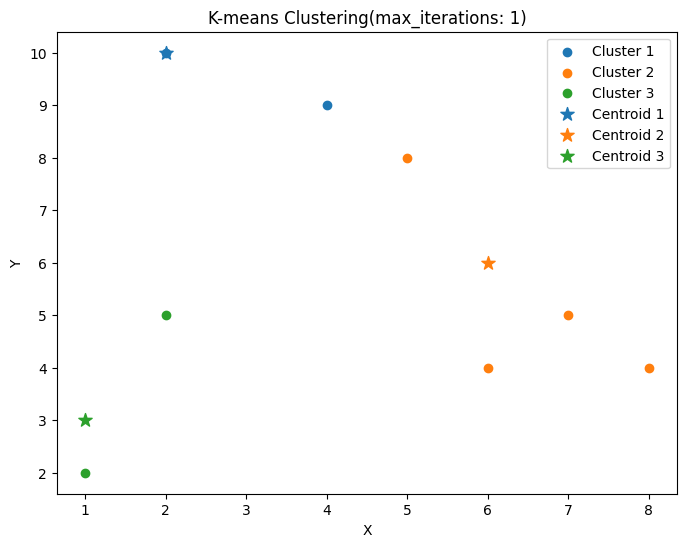

[0 2 1 1 1 1 2 0]


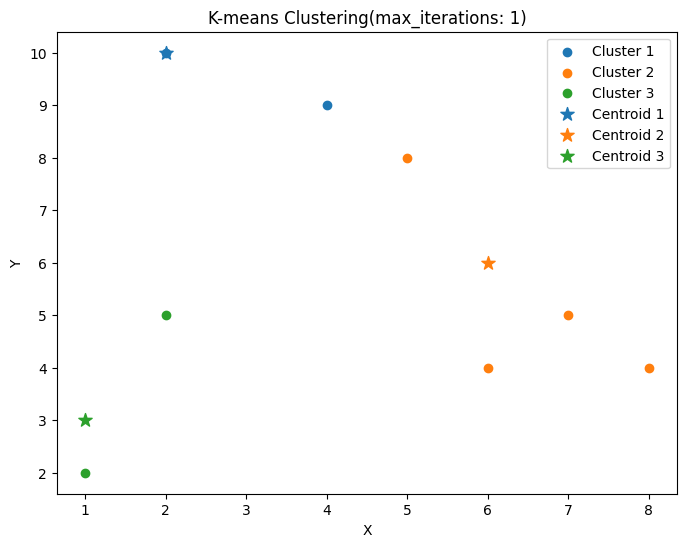

[0 2 1 1 1 1 2 0]


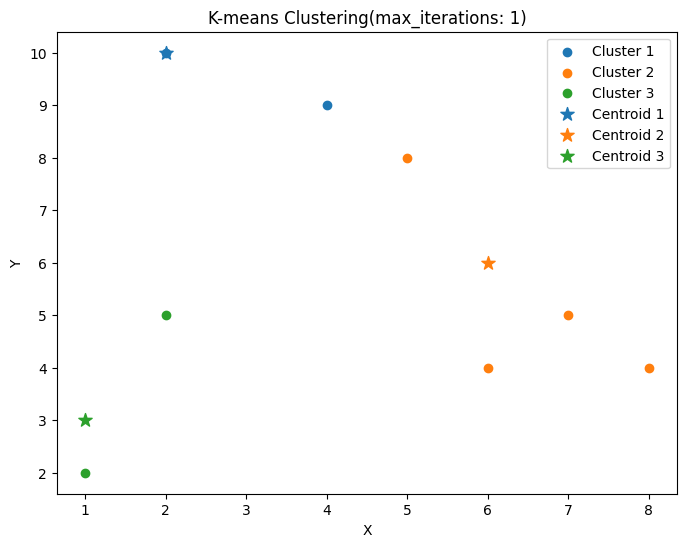

[0 2 1 1 1 1 2 0]


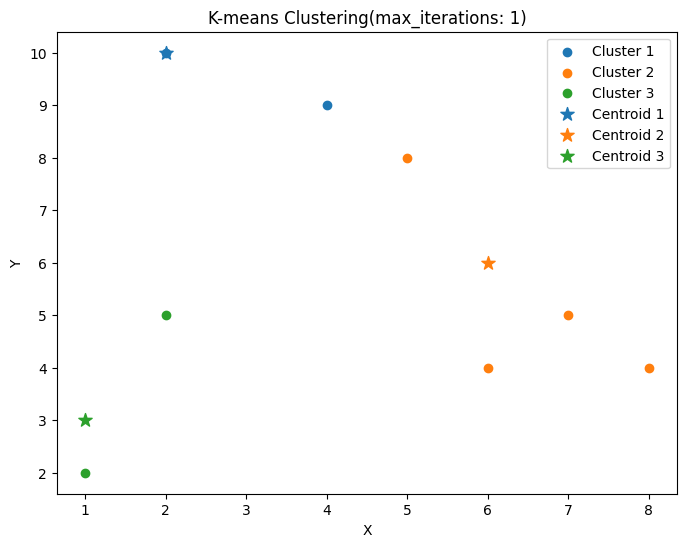

[0 2 1 1 1 1 2 0]


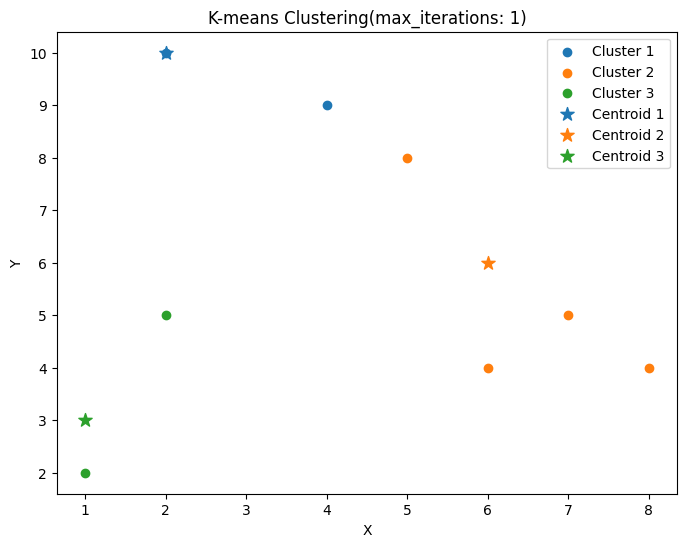

4 iterations were needed to complete the clustering task


In [98]:
points = np.array([p1, p2, p3, p4, p5, p6, p7, p8])
km = KMeans(points, n_clusters = 3, max_iterations = i)

for i in range(1,6):
  km.fit(points) 
  labels = km.labels
  print(labels)
  km.plot_clusters(points)

print(f"{i-1} iterations were needed to complete the clustering task")

### **1-3. How many iterations are needed to complete the clustering task?**  
* Only 2 iterations are needed to complete the clustering task

# **Task 2 : Open-ended problem**
* Assume that your team is tasked with evenly distributing N sample points onto the South Korea territory using the K-means algorithm.  
For example, you may need to equally distribute 10 sample points across the territory.

In [82]:
# Define the number of sample points and the number of clusters
random_points = 100
N = 10

### **2-1. What is your team's strategy to complete the task?**
* We first defined the number of sample points to be distributed and the number of clusters to be created

In [80]:
# Create a Shapely polygon object from the boundary coordinates
boundary_lat = list(territory['Latitude (deg)'])
boundary_lon = list(territory['Longitude (deg)'])
boundary_coords = [[lat, lon] for lat, lon in zip(boundary_lat, boundary_lon)]
boundary_polygon = Polygon(boundary_coords)

# Generate equally distributed points at regular intervals within the boundary polygon
minx, miny, maxx, maxy = boundary_polygon.bounds
interval_x = (maxx - minx) / (np.sqrt(random_points))
interval_y = (maxy - miny) / (np.sqrt(random_points))
random_points = []
for i in range(N):
    for j in range(N):
        x = minx + (i + 0.5) * interval_x
        y = miny + (j + 0.5) * interval_y
        random_point = Point(x, y)
        if random_point.within(boundary_polygon):
            random_points.append(random_point)

# Extract the latitude and longitude coordinates of the equally distributed points
latitudes = [point.x for point in random_points]
longitudes = [point.y for point in random_points]
sample_point = {'Latitude (deg)': latitudes, 'Longitude (deg)': longitudes}
sample_points = pd.DataFrame(sample_point)

Randomly distributed points = 63


Text(0, 0.5, 'Longitude (deg)')

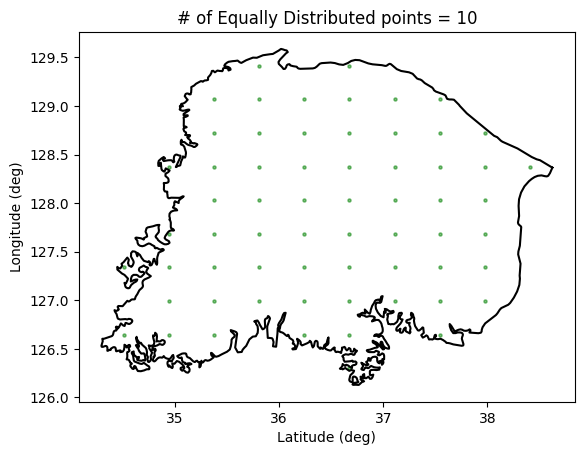

In [86]:
#make the dataframe with list of equally distributed dots
print(f"Randomly distributed points = {len(longitudes)}")
plt.title(f"# of Equally Distributed points = {N}")
plt.scatter(latitudes, longitudes, s=5, alpha=0.5,color = "green")
plt.plot(territory["Latitude (deg)"], territory["Longitude (deg)"], color = "black")
plt.xlabel("Latitude (deg)")
plt.ylabel("Longitude (deg)")

In [88]:
class KMeans:
  # 1. Specify the number of clusters, K
  def __init__(self, n_clusters, max_iterations = 100):
    self.n_clusters = n_clusters # The algorithm requires specifying the number of clusters in advance
    self.max_iterations = max_iterations
  
  # 5. Repeat steps (3 to 4) until the algorithm meets a user-defined criterion
  def fit(self, X):
    # 2. Initialize centroid points by randomly choosing K instances
    self.centroids = self._initialize_centroids(X)

    for _ in range(self.max_iterations):
      # 3.Label each data to its closest centroid point using Eucldean distance
      clusters = self._assign_clusters(X)

      # Update the centroid locations as the average of those points assigned to each cluster
      new_centroids = self._update_centroids(X, clusters)

      # Stop if the centroid points do not change any more
      if np.all(self.centroids == new_centroids):
        break
      # Reassign points based on the new centroid locations  
      self.centroids = new_centroids

    self.labels = self._assign_labels(X)
  
  # Function for calculating the Euclidean distance by 2 coordinates
  def distance(p, q):
    return np.sqrt((q[0] - p[0])**2 + (q[1] - p[1])**2)
  
  def _initialize_centroids(self, X):
    indices = np.random.choice(len(X), size = self.n_clusters, replace = False)
    centroids = X[indices]
    return centroids
  
  def _assign_clusters(self, X):
    # Visit each point and compute Euclidean distances from the centroid points
    distances = np.sqrt(((X[:, np.newaxis] - self.centroids) ** 2).sum(axis=2))
    # Find the index of the centroid with the minimum distance for each data
    clusters = np.argmin(distances, axis=1) 
    # returns an array of cluster indices indicating the closest centroid for each data point.
    return clusters 

  def _update_centroids(self, X, clusters):
        new_centroids = np.empty_like(self.centroids)
        for cluster_idx in range(self.n_clusters):
            points_in_cluster = X[clusters == cluster_idx]
            if len(points_in_cluster) > 0:
                new_centroids[cluster_idx] = points_in_cluster.mean(axis=0)
            else:
                new_centroids[cluster_idx] = self.centroids[cluster_idx]
        return new_centroids

  def _assign_labels(self, X):
      distances = np.sqrt(((X[:, np.newaxis] - self.centroids) ** 2).sum(axis=2))
      return np.argmin(distances, axis=1)

 # Visualize the results
  def plot_clusters(self, X):
        plt.figure(figsize=(8, 6))
        
        # Plot data points
        for cluster_idx in range(self.n_clusters):
            points_in_cluster = X[self.labels == cluster_idx]
            plt.scatter(points_in_cluster[:, 0], points_in_cluster[:, 1], label=f'Cluster {cluster_idx+1}')
        
        # Plot centroids with different marker
        for cluster_idx in range(self.n_clusters):
            centroid = self.centroids[cluster_idx]
            plt.scatter(centroid[0], centroid[1], color=f'C{cluster_idx}', marker='*', s=100, label=f'Centroid {cluster_idx+1}')
        
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(f'K-means Clustering(max_iterations: {self.max_iterations})')
        plt.legend()
        plt.show()

### **2-2. What does the resulting output look like?**

In [90]:
sample_points

,Latitude (deg),Longitude (deg)
0,34.508828,126.647044
1,34.508828,127.338857
2,34.942039,126.647044
3,34.942039,126.992951
4,34.942039,127.338857
...,...,...
58,37.974518,127.684764
59,37.974518,128.030671
60,37.974518,128.376577
61,37.974518,128.722484


In [89]:
samples = np.array(sample_points)

In [ ]:
labels = np.zeros(8)

for i in range(1,6):
  km = KMeans(n_clusters = 3, max_iterations = i)
  km.fit(points) 
  if np.array_equal(labels, km.labels):
    print(f"{i-1} iterations were needed to complete the clustering task")
    break 
  labels = km.labels
  print(labels)
  km.plot_clusters(points)

# **Task3: Real-world problem (i.e. Vertiport placement)**
* Suppose that your team is currently working for the Korean government. As the government has recently announced the first official roadmap for Regional Air Mobility (RAM) with the aim of introducing a new aviation transportation system, you are required to initiate a project to establish
infrastructure for the early RAM operations.
* One of the key enablers for realizing RAM operations is to construct airfields for vehicles to take off and land, which is referred to as a vertiport. The
construction of vertiport infrastructure requires careful consideration as building a vertiport is subject to land use, noise issues, or public safety.

* Assume that initial vertiport locations are determined by aerospace professionals, which is given to your
team with the file (i.e., Vertiport_candidates.csv). Your team’s responsibility is to identify a proper
number of vertiports as it is not possible to construct all the vertiport candidates at a time due to a
limited budget.

### **3-1. Visualize the vertiport candidate locations in the Korean peninsula by using the given files (i.e., South_korea_territory.csv and Vertiport_candidates.csv)**

In [ ]:
territory

,Longitude (deg),Latitude (deg)
0,128.364919,38.624335
1,128.394784,38.578074
2,128.441417,38.505805
3,128.450694,38.474107
4,128.474457,38.426093
...,...,...
1588,128.276955,38.554056
1589,128.274785,38.571497
1590,128.281089,38.584416
1591,128.308374,38.601340


In [ ]:
vertiport

,Longitude (deg),Latitude (deg)
0,126.940197,37.621876
1,127.096292,37.535756
2,126.939432,37.492020
3,127.033749,37.612760
4,126.839673,37.561111
...,...,...
7769,126.855395,33.423088
7770,126.225025,33.268913
7771,126.397977,33.336998
7772,126.719626,33.291340


### **3-2. Let’s say that the Korean government allows your team to assign only 17 vertiports in the Korean peninsula (i.e., K=17). Cluster the vertiport candidate locations using the K-Means algorithm and find the 17 centroid points, which become the final vertiport locations in this scenario.**

In [ ]:
interia = []
for k in range(num_k):
  

###**3-3. Imagine that the Korean government allows your team to place vertiports as many as your team wants**
* implying that the government does not have any financial issues. How many vertiports does your team want to establish in the Korean peninsula? 
* Your team may not want
to spend unnecessary building costs (e.g., consider all the given vertiports); but would like to invest money in an efficient manner  
(e.g., find an appropriate number of vertiports).